In [138]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
s = pd.Series([3, 1, 16, -4, 97])
s

0     3
1     1
2    16
3    -4
4    97
dtype: int64

In [11]:
s = pd.Series([3, 1, 16, -4, 97], index=list('abcde'))
s

a     3
b     1
c    16
d    -4
e    97
dtype: int64

In [12]:
s = pd.Series([3, 1, 16, -4, 97], index=pd.date_range('2020-03-03', freq='D', periods=5))
s

2020-03-03     3
2020-03-04     1
2020-03-05    16
2020-03-06    -4
2020-03-07    97
Freq: D, dtype: int64

In [14]:
s = pd.Series([3, 1, 16, -4, 97])
s

0     3
1     1
2    16
3    -4
4    97
dtype: int64

In [19]:
letters = pd.Series(np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), 100))
numbers = pd.Series(np.random.choice(np.arange(1, 100), 100))

In [20]:
numbers.astype('float')

0     28.0
1     30.0
2     66.0
3     98.0
4     92.0
      ... 
95    24.0
96    68.0
97    48.0
98    86.0
99    53.0
Length: 100, dtype: float64

In [22]:
letters == 'a'

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [23]:
letters[letters == 'a']

15    a
50    a
77    a
78    a
dtype: object

In [27]:
greater_than_50_filter = numbers > 50
is_even_filter = numbers % 2 == 0
is_divisible_by_5 = numbers % 5 == 0

In [30]:
numbers[greater_than_50_filter & is_even_filter & is_divisible_by_5]

5     60
72    90
80    80
93    60
dtype: int64

In [36]:
vowels = list('aeiou')
vowels

['a', 'e', 'i', 'o', 'u']

In [50]:
letters[letters.isin(vowels)]

6     i
15    a
17    o
19    e
25    i
30    e
37    u
42    o
44    u
47    o
50    a
52    o
53    i
57    e
77    a
78    a
80    i
83    e
86    i
87    e
dtype: object

In [48]:
# gives total number of instances
letters.isin(vowels).sum()

20

In [56]:
# does string concatenation
letters[letters.isin(vowels)].sum()

'iaoeieuouoaoieaaieie'

In [60]:
letters[letters.isin(vowels)].shape

(20,)

In [61]:
letters[letters.isin(vowels)].size

20

In [62]:
(letters == 'b').any()

True

In [63]:
(numbers > 0).all()

True

In [68]:
# how many of each individual instance of a thing
# whenever you have a series you can do a .value_count() on them
letters[letters.isin(vowels)].value_counts()

i    5
e    5
o    4
a    4
u    2
dtype: int64

In [81]:
letters[letters.isin(vowels)].value_counts().sort_values().tail(1)

e    5
dtype: int64

In [84]:
numbers.count(), numbers.mean(), numbers.std()

(100, 52.01, 28.64780739754561)

In [85]:
numbers.agg(['count', 'mean', 'std'])

count    100.000000
mean      52.010000
std       28.647807
dtype: float64

In [86]:
numbers.describe()

count    100.000000
mean      52.010000
std       28.647807
min        1.000000
25%       28.000000
50%       52.000000
75%       76.250000
max       98.000000
dtype: float64

In [87]:
number_summary = numbers.describe()

In [88]:
number_summary['75%'] - number_summary['25%']

48.25

In [92]:
def is_divisible_by_four(n):
    if n % 4 == 0:
        return 'Evenly Divisible By Four!'
    else:
        return 'Not Evenly Divisible By Four :('

numbers.apply(is_divisible_by_four)

0           Evenly Divisible By Four!
1     Not Evenly Divisible By Four :(
2     Not Evenly Divisible By Four :(
3     Not Evenly Divisible By Four :(
4           Evenly Divisible By Four!
                   ...               
95          Evenly Divisible By Four!
96          Evenly Divisible By Four!
97          Evenly Divisible By Four!
98    Not Evenly Divisible By Four :(
99    Not Evenly Divisible By Four :(
Length: 100, dtype: object

In [102]:
def bin_number(n):
    if n < 25:
        return "(0, 25]"
    elif n < 50:
        return "(25, 50]"
    elif n < 75:
        return "(50, 75]"
    else:
        return "(75, 101]"
    
bin_number(60)
numbers.apply(bin_number).value_counts().sort_index()

(0, 25]      21
(25, 50]     24
(50, 75]     28
(75, 101]    27
dtype: int64

In [103]:
numbers.value_counts(bins=4).sort_index()

(0.902, 25.25]    21
(25.25, 49.5]     24
(49.5, 73.75]     27
(73.75, 98.0]     28
dtype: int64

In [108]:
pd.cut(numbers, 4).value_counts().sort_index()

(0.903, 25.25]    21
(25.25, 49.5]     24
(49.5, 73.75]     27
(73.75, 98.0]     28
dtype: int64

In [109]:
pd.cut(numbers, 4).value_counts().sort_index(ascending=False)

(73.75, 98.0]     28
(49.5, 73.75]     27
(25.25, 49.5]     24
(0.903, 25.25]    21
dtype: int64

In [112]:
pd.cut(numbers, 4, labels=['very small', 'small', 'large', 'very large']).value_counts().sort_index()

very small    21
small         24
large         27
very large    28
dtype: int64

In [113]:
pd.cut(numbers, 8).value_counts().sort_index()

(0.903, 13.125]     8
(13.125, 25.25]    13
(25.25, 37.375]    17
(37.375, 49.5]      7
(49.5, 61.625]     15
(61.625, 73.75]    12
(73.75, 85.875]    10
(85.875, 98.0]     18
dtype: int64

In [114]:
pd.qcut(numbers, 8).value_counts().sort_index()

(0.999, 18.375]    13
(18.375, 28.0]     14
(28.0, 37.125]     11
(37.125, 52.0]     13
(52.0, 62.875]     11
(62.875, 76.25]    13
(76.25, 88.0]      13
(88.0, 98.0]       12
dtype: int64

In [121]:
numbers.apply(is_divisible_by_four).str.lower()

0           evenly divisible by four!
1     not evenly divisible by four :(
2     not evenly divisible by four :(
3     not evenly divisible by four :(
4           evenly divisible by four!
                   ...               
95          evenly divisible by four!
96          evenly divisible by four!
97          evenly divisible by four!
98    not evenly divisible by four :(
99    not evenly divisible by four :(
Length: 100, dtype: object

In [122]:
numbers.apply(is_divisible_by_four).str[:4]

0     Even
1     Not 
2     Not 
3     Not 
4     Even
      ... 
95    Even
96    Even
97    Even
98    Not 
99    Not 
Length: 100, dtype: object

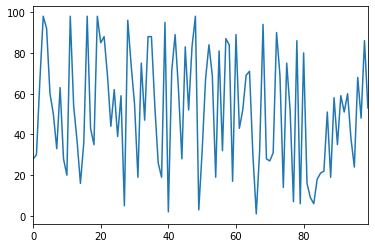

In [139]:
numbers.plot()

Text(0.5, 1.0, 'Distribution of Numbers')

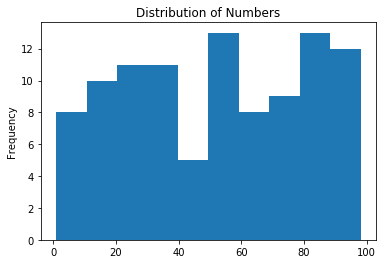

In [140]:
numbers.plot.hist()
plt.title("Distribution of Numbers")

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

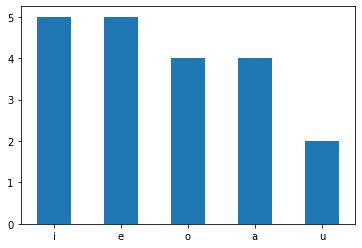

In [141]:
letters[letters.isin(vowels)].value_counts().plot.bar()
plt.xticks(rotation=0)

In [142]:
s[0] = 16

In [143]:
s

0    16
1     1
2    16
3    -4
4    97
dtype: int64

In [144]:
pd.__version__

'0.25.1'